# KMeans v2 with PCA-reduced features

In [10]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.cluster import k_means_elbow_analysis, silhouette_analysis, fit_kmeans

## Read in scaled features

In [2]:
df = pd.read_csv("../data/cohort_features_pca_v2.csv", index_col="ID")
df.head(5)

,PC1,PC2
ID,,
0,-8.616509,-0.329346
1,-9.616819,-0.435717
2,-9.331722,-3.538748
3,-9.757332,-0.521219
4,-7.608936,-3.519949


## Parameter exploration

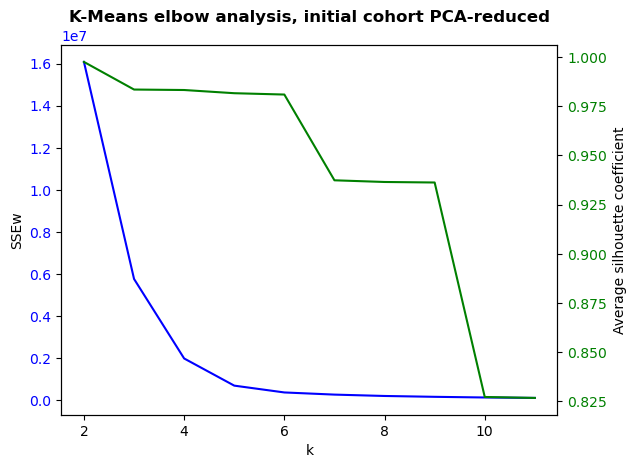

    k         sse_w  silhouette
0   2  1.607546e+07    0.997609
1   3  5.755945e+06    0.983557
2   4  1.974669e+06    0.983316
3   5  6.837134e+05    0.981690
4   6  3.593982e+05    0.981008
5   7  2.568709e+05    0.937374
6   8  1.919756e+05    0.936517
7   9  1.518065e+05    0.936255
8  10  1.200343e+05    0.827112
9  11  9.928010e+04    0.826638


In [3]:
"""
Use the elbow method to determine the "k", number of clusters
"""
# Determine the range of k values to analyse
k_max = 11
k_list = np.linspace(1, k_max, 11, dtype=int)[1:]

k_means_elbow_analysis(
    k_list, df,
    title=f"K-Means elbow analysis, initial cohort PCA-reduced"
)

For k = 4 The average silhouette_score is : 0.9833162016141365
For k = 5 The average silhouette_score is : 0.9816895381345861
For k = 6 The average silhouette_score is : 0.9810079517695416


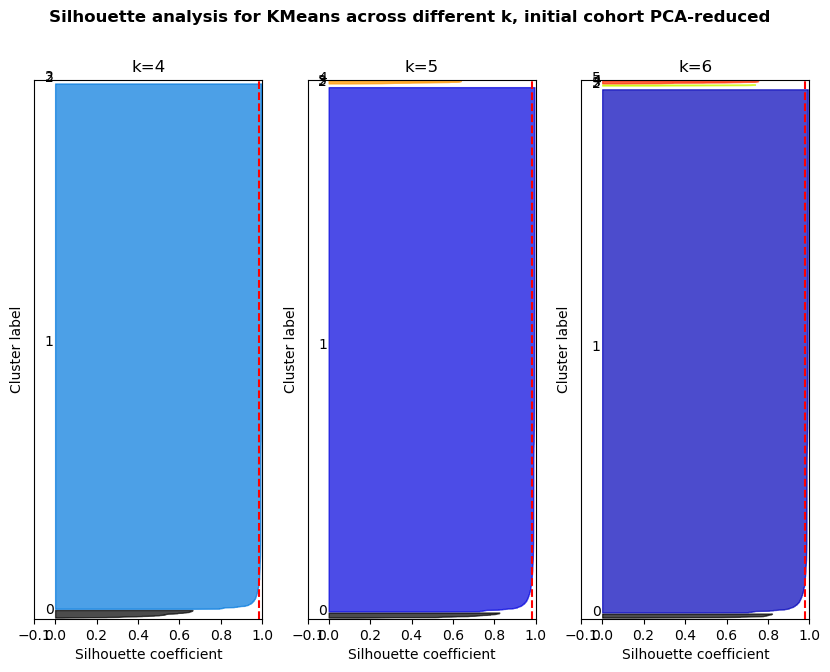

In [4]:
"""
Deep dive selected values of k

Below analysis is adapted from:
https://scikit-learn.org/0.24/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
"""

range_k = [4, 5, 6]

silhouette_analysis(
    range_k, df,
    title=f"Silhouette analysis for KMeans across different k, initial cohort PCA-reduced"
)

## Assign the clusters

In [5]:
k = 5
_, kmeans = fit_kmeans(args=(k, df))
assigned_clusters = pd.DataFrame(kmeans.predict(df), columns=["cluster"])
assigned_clusters.index.name = "ID"
assigned_clusters.to_csv(f"../data/cohort_clusters_kmeans_{k}_v2_pca.csv")
assigned_clusters

,cluster
ID,
0,1
1,1
2,1
3,1
4,1
...,...
4643,1
4644,1
4645,1


In [6]:
assigned_clusters.value_counts()

cluster
1          4579
0            45
4            22
2             1
3             1
dtype: int64

## Generate the COS

In [7]:
# Get the cluster label for COS
cos_label = assigned_clusters.value_counts().index[0][0]
cos_label

1

In [8]:
df_cluster = pd.merge(left=df, right=assigned_clusters, on="ID")
cos = df_cluster[df_cluster["cluster"] == cos_label].drop(columns=["cluster"])
cos.to_csv("../data/cos_pca_kmeans_v2.csv")
cos

,PC1,PC2
ID,,
0,-8.616509,-0.329346
1,-9.616819,-0.435717
2,-9.331722,-3.538748
3,-9.757332,-0.521219
4,-7.608936,-3.519949
...,...,...
4643,-8.473257,-0.340542
4644,-8.473879,-0.469492
4645,-9.473750,-0.359499


In [9]:
df_cluster

,PC1,PC2,cluster
ID,,,
0,-8.616509,-0.329346,1
1,-9.616819,-0.435717,1
2,-9.331722,-3.538748,1
3,-9.757332,-0.521219,1
4,-7.608936,-3.519949,1
...,...,...,...
4643,-8.473257,-0.340542,1
4644,-8.473879,-0.469492,1
4645,-9.473750,-0.359499,1


/var/folders/97/8lyvqyzd5bsfdkzn8pwdymb00000gn/T/ipykernel_17043/2314965667.py:6: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(df_cluster, x="PC1", y="PC2", hue="cluster", ax=ax, palette=pal)


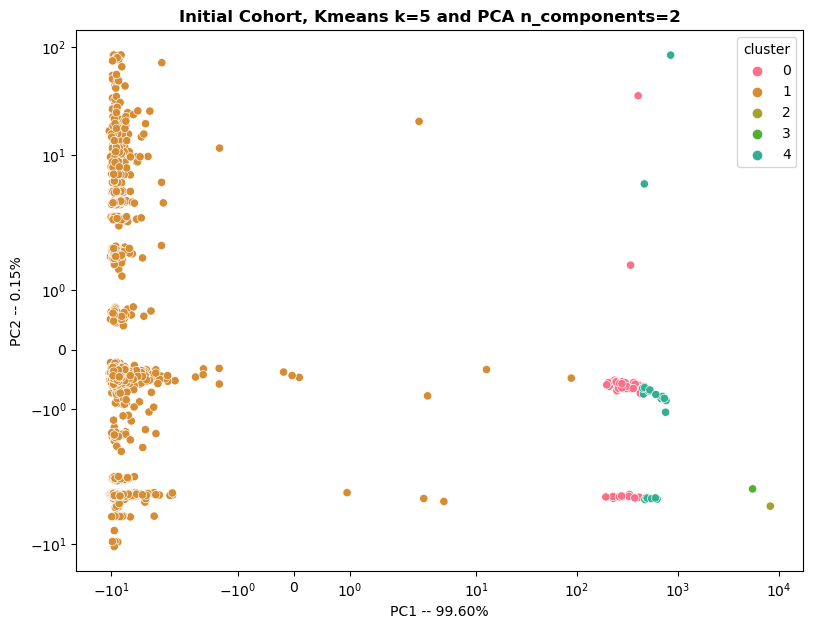

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.tight_layout()

pal = sns.color_palette("husl", 9)
sns.scatterplot(df_cluster, x="PC1", y="PC2", hue="cluster", ax=ax, palette=pal)

ax.set_xscale("symlog")
ax.set_yscale("symlog")
ax.set_xlabel(f"PC1 -- 99.60%")
ax.set_ylabel(f"PC2 -- 0.15%")

fig.suptitle("Initial Cohort, Kmeans k=5 and PCA n_components=2",
             fontweight="semibold", y=1.0)

plt.show()